#Libraries and Data

In [1]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Load the CSV
air_data = pd.read_csv('airmiles.csv', index_col="Date")

In [4]:
#Convert Date column to a datetime object in the correct format
air_data.index = pd.to_datetime(air_data.index,
                                format = "%d/%m/%Y")
air_data.head(2)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663


In [11]:
#Reaname Second Column
air_data = air_data.rename(columns = {'airmiles':'y'})

In [13]:
#Set Index Frequency of the Table to Monthly
air_data = air_data.asfreq("MS")

<Axes: xlabel='Date'>

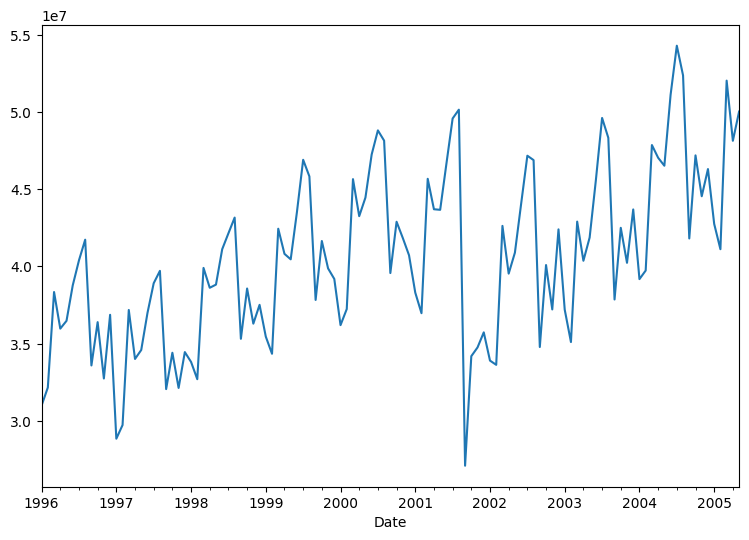

In [14]:
#Visualize the Data
air_data['y'].plot(figsize=(9,6))

#Create the Training and Test Set

In [21]:
#Specify Training and Test Set
test_range = 12
training_set = air_data.iloc[:-test_range, :]
test_set = air_data.iloc[-test_range:, :]

#Holt Winters Forecast

In [22]:
#Load Library for Holt Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
#Forecast
model = ExponentialSmoothing(endog = training_set.y,
                             trend = 'add',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [28]:
#Predictions
predictions_hw = model.forecast(steps = 12).rename('HW')
predictions_hw.head()

2004-06-01    4.985031e+07
2004-07-01    5.224279e+07
2004-08-01    5.236168e+07
2004-09-01    4.136596e+07
2004-10-01    4.618046e+07
Freq: MS, Name: HW, dtype: float64

<Axes: xlabel='Date'>

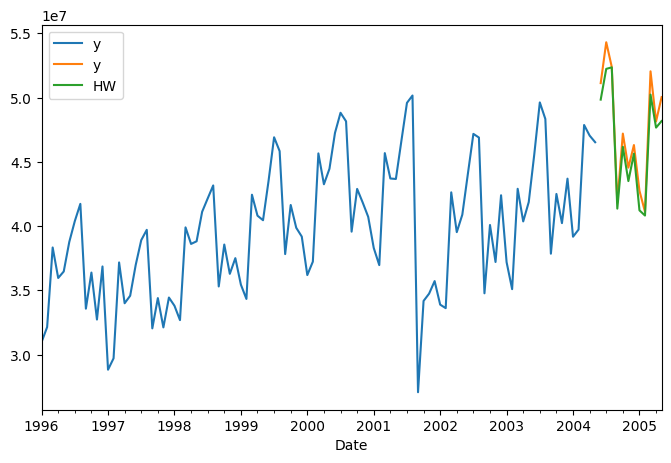

In [32]:
#Visualization
training_set['y'].plot(figsize = (8,5), legend=True)
test_set['y'].plot(legend=True)
predictions_hw.plot(legend=True)

#Model Assesment

In [33]:
#MAE AND RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(round(mean_absolute_error(test_set['y'], predictions_hw), 0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 0))

1046934.0
1230641.0


In [34]:
#MAPE Function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) *100

MAPE(test_set['y'], predictions_hw)

2.1608951696642302